<a href="https://colab.research.google.com/github/Guilhem93/PythonH3/blob/master/projet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
"""Exo Projet data science
Automatically generated by Colaboratory.
"""
" Imporation des librairies nécessaires "
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
print("Importé")

from google.colab import drive
drive.mount('/content/gdrive')

" Analyse des données .CSV"
df=pd.read_csv('gdrive/My Drive/Projet Python/Pokemon.csv')
df.head(100)


Importé
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,88,Grimer,Poison,NaN,325,80,80,50,40,50,25,1,False
96,89,Muk,Poison,NaN,500,105,105,75,65,100,50,1,False
97,90,Shellder,Water,NaN,305,30,65,100,45,25,40,1,False
98,91,Cloyster,Water,Ice,525,50,95,180,85,45,70,1,False


In [24]:
df.info() #"Informations des données"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [14]:
#"Traitement des NAN "
#" Vérification s'il y en a"
import math
x = float('nan')
math.isnan(x)

df.dropna() #"Supprime les données manquantes"
#df.fillna(10) #"Rempli les données manquantes "

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


UFuncTypeError: ignored

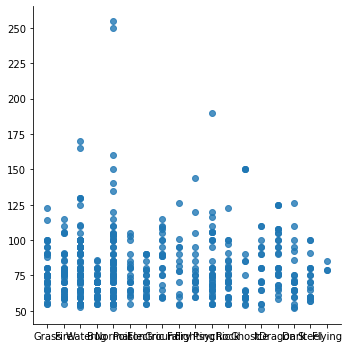

In [84]:
#"Graphique 1 : 
graphique = sns.lmplot(x="Type 1", y="HP", data=df.query("HP > 50"))  # Ce graphique retourne les genres de pokemon avec un nombre de vie au dessus de 50









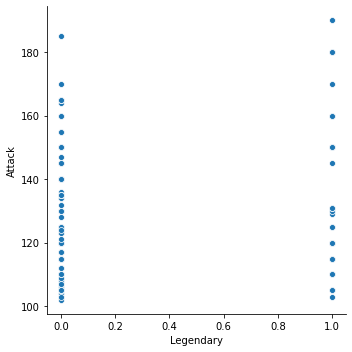

In [60]:
#Graphique 2 :
graphique = sns.relplot(x="Legendary", y="Attack", data=df.query("Attack > 100")) #Retourne les Pokemons légendaires ayant une attaque supérieure à 100 











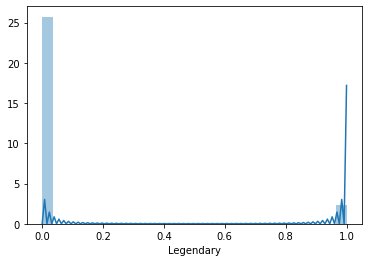

In [43]:
#Graphique 3 : 
x= df.Legendary
sns.distplot(x)

# Ce graphique représente le taux de légendaire qu'il y a dans nos données. Nous pouvons remarqué qu'on atteint les 15 et plus de légendaires.


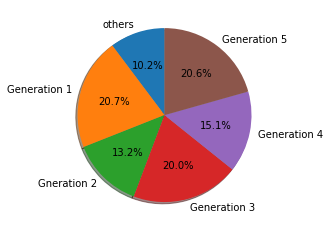

In [29]:
#Graphique 4 :
 # Ce graphique permet de voir le poucentage des générations pokemons. On remarque qu'ils sont bien répartis.
Poke_Generation1 = np.sum(df.Generation== 1)
Poke_Generation2 = np.sum(df.Generation== 2)
Poke_Generation3 = np.sum(df.Generation== 3)
Poke_Generation4 = np.sum(df.Generation== 4)
Poke_Generation5 = np.sum(df.Generation== 5)
Poke_others = sum(1 for _ in df.Generation)
Poke_others = Poke_others - Poke_Generation1 - Poke_Generation2 - Poke_Generation3 - Poke_Generation4 - Poke_Generation5
sizes = [Poke_others, Poke_Generation1, Poke_Generation2, Poke_Generation3, Poke_Generation4, Poke_Generation5]
labels = 'others', 'Generation 1', 'Generation 2', 'Generation 3', 'Generation 4', 'Generation 5'
x = plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)



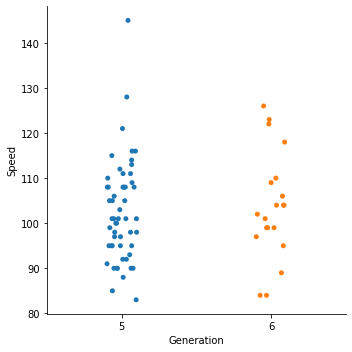

In [40]:
#Graphique 5 :
# Ce graphique permet de voir  le nombre de pokemon des générations au dessus de la 4 et ayant une vitesse supérieure à 80 
filtre = df.query ('(Generation > 4) & (Speed > 80)')
sns.catplot(x='Generation', y='Speed', data=filtre)






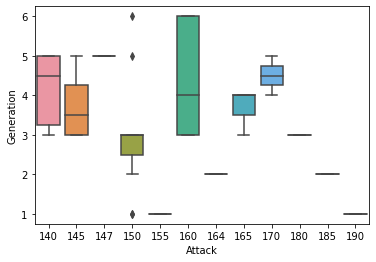

In [75]:
#Graphique 6  : Ce graphique affiche le nombre  pokemons de différentes générations qui  ont une attaque au dessus de 140
mask = (df.Attack >= 140)
sns.boxplot(x='Attack', y='Generation', data=df[mask])

In [56]:
#Mask Eval 1

mask = (df.Attack < 60) | (df.Defense > 80)
print (mask)
print (df[mask])
#Trie les pokemons par booleens et affiche que ceux qui ont une attaque en dessous de 60 et au dessus de 80 en defense.

0       True
1      False
2       True
3       True
4       True
       ...  
795     True
796     True
797    False
798    False
799     True
Length: 800, dtype: bool
       #                       Name  Type 1  ... Speed  Generation  Legendary
0      1                  Bulbasaur   Grass  ...    45           1      False
2      3                   Venusaur   Grass  ...    80           1      False
3      3      VenusaurMega Venusaur   Grass  ...    80           1      False
4      4                 Charmander    Fire  ...    65           1      False
7      6  CharizardMega Charizard X    Fire  ...   100           1      False
..   ...                        ...     ...  ...   ...         ...        ...
793  717                    Yveltal    Dark  ...    99           6       True
794  718           Zygarde50% Forme  Dragon  ...    95           6       True
795  719                    Diancie    Rock  ...    50           6       True
796  719        DiancieMega Diancie    Rock  ...   1

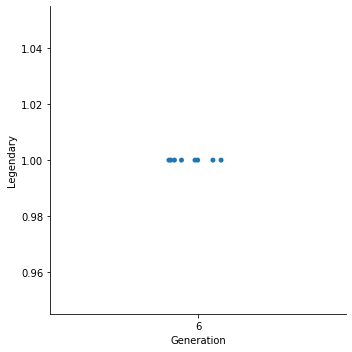

In [86]:
filtre = df.query ('(Generation == 6) & (Legendary == True)')
sns.catplot(x='Generation', y='Legendary', data=filtre)
